# Домашняя работа 4: SVM и KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets

##### Подгружаем данные

In [3]:
data = pd.read_csv('custom_dataset.csv')
# Проверим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4096 non-null   int64  
 1   feature_1   4096 non-null   float64
 2   feature_2   4096 non-null   float64
 3   target      4096 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 128.1 KB


In [4]:
X = data[['feature_1', 'feature_2']].to_numpy()
y = data['target'].to_numpy()

##### Посмотрим, как выглядит выборка

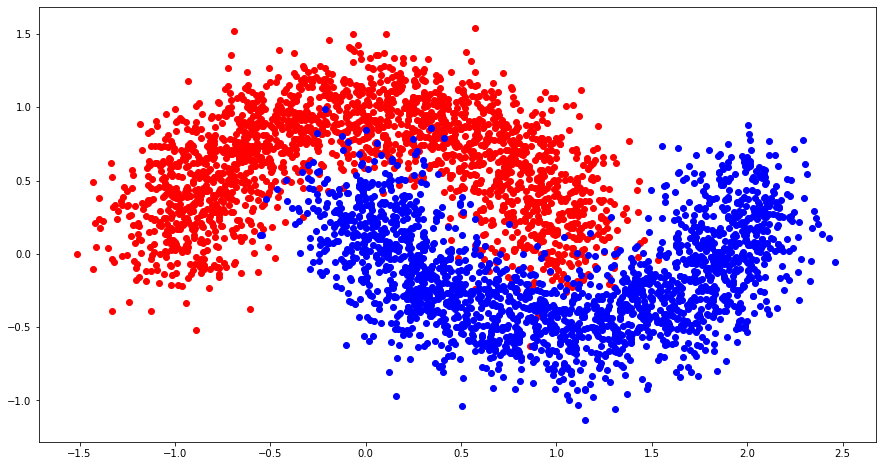

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'blue'}

for key, value in colors.items(): 
    
    ax.scatter(X[y==key, 0],X[y==key, 1], c=value, label=key)
plt.axis('tight')

plt.show()

### SVM

##### Обучим на всех данных и посмотрим, насколько корректно преобразование фичей

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

# Преобразуем фичи под полином 3 степени
X_polynom = PolynomialFeatures(degree=3).fit_transform(X)
model_svm = SVC(kernel='linear')
model_svm.fit(X_polynom, y)

SVC(kernel='linear')

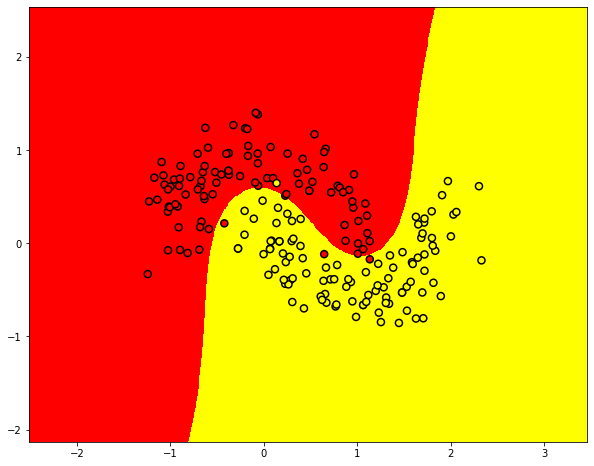

In [7]:
x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)


predicted = model_svm.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [9]:
margin = 1 / np.sqrt(np.sum(model_svm.coef_ ** 2))
print("Ширина разделающей полосы = ", 2 * margin)

Ширину разделающей полосы =  0.1911784882193888


##### Обучим на тестовой выборке и посчитаем точность

In [68]:
# установим random_state, чтобы результаты эксперимента были воспроизводимы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_svm.fit(X_train_polynom, y_train)
X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_svm.predict(np.c_[X_test_polynom])

In [70]:
accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность SVM: ", accuracy)

Точность SVM:  0.9652366863905325


### KNN

##### Аналогично действуем с KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

X_polynom = PolynomialFeatures(degree=3).fit_transform(X)
model_knn = KNeighborsClassifier()
model_knn.fit(X_polynom, y)

KNeighborsClassifier()

/tmp/ipykernel_10490/1808773043.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


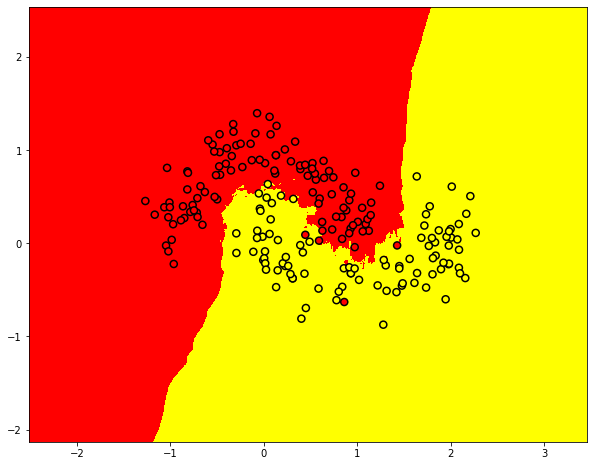

In [73]:
x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)

predicted = model_knn.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_knn.fit(X_train_polynom, y_train)
X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_knn.predict(np.c_[X_test_polynom])

In [75]:
accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность KNN: ", accuracy)

Точность KNN:  0.9674556213017751
